# Principal Component Analysis (PCA)

### What is the dimensionality of a dataset?
In the context of both statistics and machine learning, the dimensionality of a dataset refers to the number of input variables (features) in the dataset.

If the dataset contains only two input variables as in the following image, it is called a two-dimensional dataset. In this case, the observations (data points) can be plotted in a 2D scatterplot.

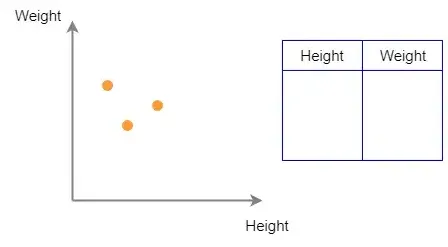

If we add another variable called Age to the same dataset, we implicitly add another dimension to the dataset. Now, the dataset becomes three-dimensional and the observations (data points) can be plotted in a 3D scatterplot.

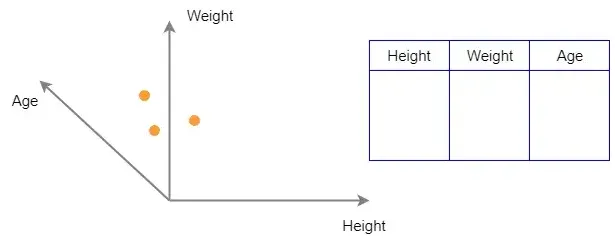

### What is dimensionality reduction?
As the name suggests, dimensionality reduction simply means reducing the number of features in the datasets.

There are many techniques for dimensionality reduction as shown in the following diagram.

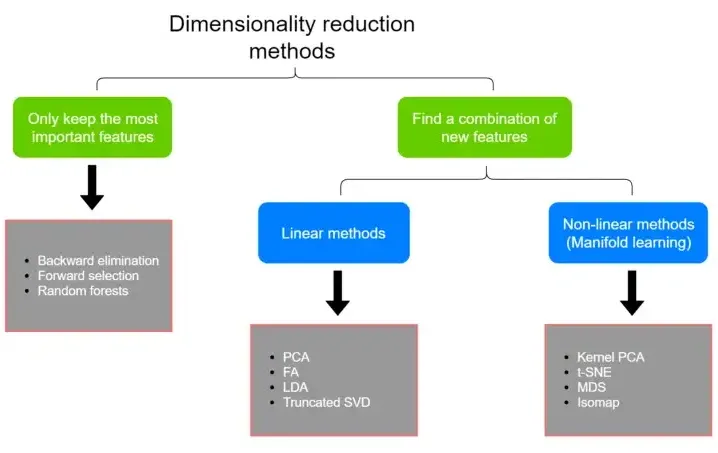

PCA is a linear dimensionality reduction technique that finds a linear combination of new features in a lower dimensional space. The new set of features has completely different values because the PCA algorithm transforms original data values into a new set of values.

The transformed data will accurately represent the original data if we choose the right number of principal components while doing PCA and can be used for another machine learning task such as regression, classification, clustering, or even data visualization.

## PCA
>PCA is a linear dimensionality reduction technique that transforms the p number of input variables into a smaller k (k << p) number of uncorrelated variables called principal components by taking advantage of the existing correlations between the input variables in the dataset.

The main challenge in PCA is to choose the right number of principal components that should be able to capture a higher amount of variance in the original dataset. The right number of principal components will accurately represent the original dataset. The right number of principal components that we want to keep is highly dependable on many factors.


### The Wine dataset
Lets use the Wine classification dataset to perform dimensionality reduction using PCA.

The Wine dataset comes preloaded with Scikit-learn. It can be loaded by calling the load_wine() function as follows. The Wine dataset has 178 samples (data points). Every data point have 13 features (dimensions). The dataset also represent 3 classes (wine category or labels)

In [3]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

wine = load_wine()
X = wine.data
y = wine.target

print("Wine dataset size:", X.shape)

print("Classes in the target variable:", np.unique(y))


df = pd.DataFrame(wine.data, 
                  columns=wine.feature_names)
df.head()

Wine dataset size: (178, 13)
Classes in the target variable: [0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 3 Easy steps to perform PCA
The most effective way of performing PCA is to run the PCA algorithm twice: One for selecting the best number of components and the other for applying the transformation to the dataset. We also need to do feature standardization before running the PCA algorithm. So, the steps are summarized below.

- Step 1: Feature standardization: PCA starts with standardization, converting features to a common scale
- Step 2: Select the best components
    - Compute Covariance Matrix: This shows how variables relate to one another
    - Find Eigenvectors and Eigenvalues: These are calculated from the covariance matrix. The eigenvectors direct us to the principal components, and eigenvalues tell us their importance.
- Step 3: Transform Data: Finally, transform the data to the new space defined by the principal components.

### Step 1: Feature standardization
We need to do feature standardization to get all features into the same scale because PCA is highly sensitive to the relative ranges of features. Standardization rescales data to have a mean of 0 and a standard deviation of 1. This process is essential in PCA to treat all variables equally, especially when they are on different scales.

$$ z = \frac{(x - \mu)}{\sigma} $$

Where:

- $x$ is the original value of the feature.
- $\mu$ is the mean of the feature across all data points.
- $\sigma$ is the standard deviation of the feature across all data points.
- $z$ is the standardized value of the feature.

**Feature standardization is optional when:**
- There is no significant difference in the relative ranges of features.
- We perform PCA using the correlation matrix instead of the covariance matrix.

**Python Code**

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample Data
age = np.array([25, 30, 35, 40, 45])
height = np.array([175, 180, 185, 165, 170])
weight = np.array([70, 80, 75, 65, 72])

# Standardizing the data
age_std = (age - np.mean(age)) / np.std(age)
height_std = (height - np.mean(height)) / np.std(height)
weight_std = (weight - np.mean(weight)) / np.std(weight)

print("Standardized Age:", age_std)
print("Standardized Height:", height_std)
print("Standardized Weight:", weight_std)

# We can directly use the StandardScaler class from scikit to standardized the data
# Stack each feature as column to build a feature matrix
X = np.stack((age, height, weight), axis=1)
X_scaled = StandardScaler().fit_transform(X)
print("Standardized Age using StandardScaler:", X_scaled)

Standardized Age: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
Standardized Height: [ 0.          0.70710678  1.41421356 -1.41421356 -0.70710678]
Standardized Weight: [-0.47961646  1.51878546  0.5195845  -1.47881742 -0.07993608]
Original Data: [[ 25 175  70]
 [ 30 180  80]
 [ 35 185  75]
 [ 40 165  65]
 [ 45 170  72]]
Standardized Age using StandardScaler: [[-1.41421356  0.         -0.47961646]
 [-0.70710678  0.70710678  1.51878546]
 [ 0.          1.41421356  0.5195845 ]
 [ 0.70710678 -1.41421356 -1.47881742]
 [ 1.41421356 -0.70710678 -0.07993608]]


### Step 2: Select the best components

#### Compute Covariance Matrix
The covariance matrix shows how each variable in the dataset varies with the others. It’s a key element in PCA, helping to understand the relationships between different variables.



The covariance matrix is a mathematical concept that captures the covariance between pairs of variables in a dataset. Covariance measures how much two variables change together. If the variables tend to show similar behavior (i.e., when one variable increases, the other also increases), the covariance is positive. If one variable tends to increase when the other decreases, the covariance is negative. If the variables are independent, the covariance is close to zero.

#### Expression

For two variables $X$ and $Y$, each with $n$ observations, the covariance $cov(X, Y)$ is calculated as:

$$ cov(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$

Where:
- $X_i$ and $Y_i$ are the individual observations of variables $X$ and $Y$, respectively.
- $\bar{X}$ and $\bar{Y}$ are the means of $X$ and $Y$, respectively.
- $n$ is the number of observations.

**Covariance Matrix**

The covariance matrix for a dataset with $p$ variables is a $p \times p$ matrix where each element $(i, j)$ is the covariance between the $i^{th}$ and $j^{th}$ variables. The diagonal elements of the matrix represent the variances of each variable, as variance is a special case of covariance where the two variables are the same.


#### Eigenvectors: The Directions of Variance
Eigenvectors are where the magic of PCA begins to unfold. In the context of PCA, each eigenvector represents a principal component. Imagine your multidimensional data as a cloud of points. Eigenvectors are directions through this cloud. For example, in a 3D space, an eigenvector could be a line passing through this cloud in any direction.

The beauty of these eigenvectors is that they are oriented in the directions where the data varies the most. The first eigenvector (or the first principal component) points to where the variance is greatest. The second eigenvector is perpendicular to the first and points to the next highest variance direction, and so on.

#### Eigenvalues: Quantifying Significance
Each eigenvector has a corresponding eigenvalue. An eigenvalue in PCA quantifies the amount of variance captured in the direction of its eigenvector. A higher eigenvalue means more variance (information) in that direction. This is why we often arrange the principal components in descending order of their eigenvalues — to rank them by their significance.

Covariance Matrix:
 [[ 1.25       -0.625      -0.38859798]
 [-0.625       1.25        0.98915848]
 [-0.38859798  0.98915848  1.25      ]]
Eigenvalues:
 [2.61795752 0.90746972 0.22457276]
Eigenvectors:
 [[ 0.46701267 -0.85860045 -0.21143426]
 [-0.64823991 -0.16980773 -0.7422603 ]
 [-0.60140185 -0.48370509  0.63588144]]


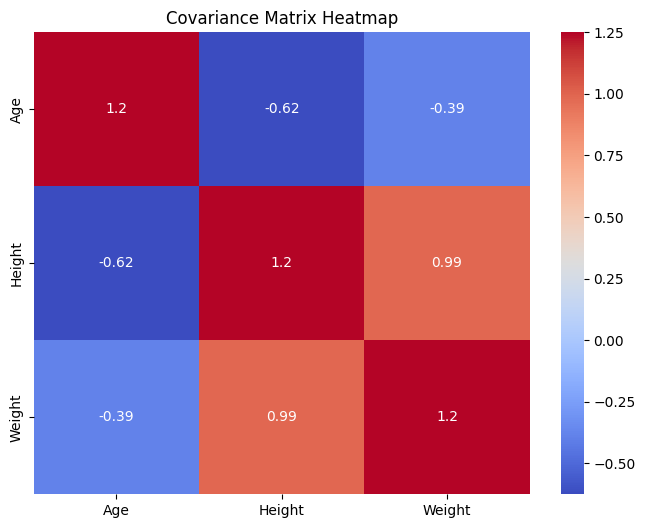

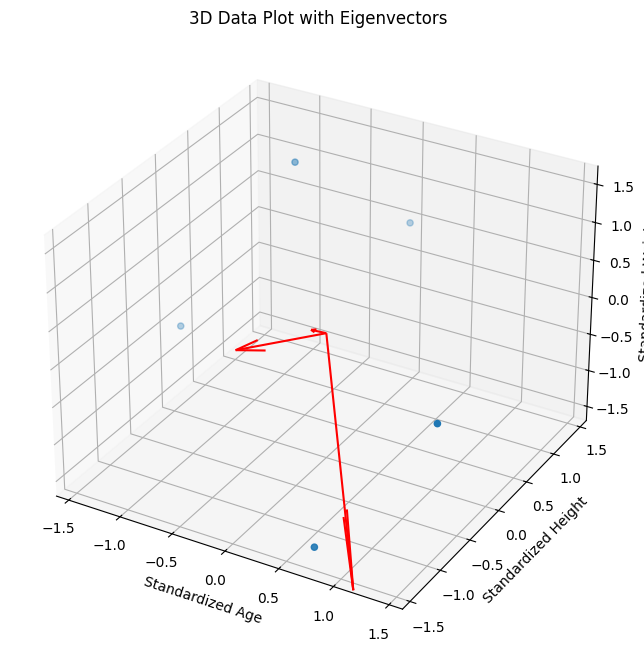

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Creating a matrix of the standardized data
X_std = np.column_stack((age_std, height_std, weight_std))

# Calculating the covariance matrix
cov_matrix = np.cov(X_std.T)

# Eigendecomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print("Covariance Matrix:\n", cov_matrix)
print("Eigenvalues:\n", eigen_vals)
print("Eigenvectors:\n", eigen_vecs)


# Covariance Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=['Age', 'Height', 'Weight'], yticklabels=['Age', 'Height', 'Weight'])
plt.title('Covariance Matrix Heatmap')
plt.show()

# 3D Data Plot with Eigenvectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age_std, height_std, weight_std)

# Adding eigenvectors to the 3D plot
for i in range(len(eigen_vals)):
    vec = eigen_vecs[:,i] * eigen_vals[i]
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='r')

ax.set_xlabel('Standardized Age')
ax.set_ylabel('Standardized Height')
ax.set_zlabel('Standardized Weight')
plt.title('3D Data Plot with Eigenvectors')
plt.show()

### Wine dataset PCA

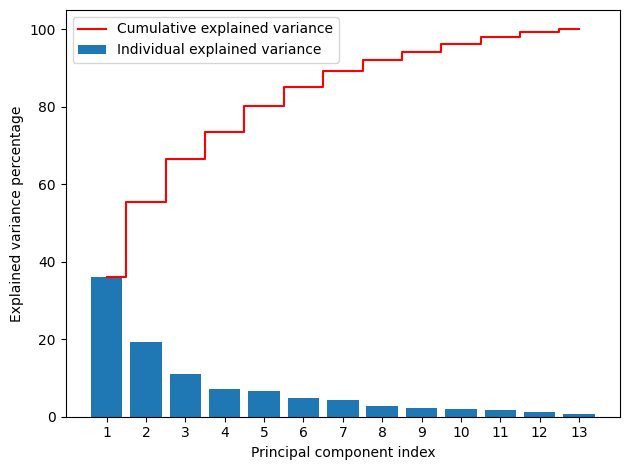

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 14), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 14), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig("cumulative_explained_variance_plot.png")

This type of plot is called the cumulative explained variance plot and is extremely useful to find the best number of principal components when doing PCA.

The number of bars is equal to the number of all principal components which is also equal to the number of features in the dataset.

The height of each bar represents the variance explained by each principal component.

The step plot represents the cumulative variance explained by a particular number of principal components.

**According to the above plot,**

- The first two components capture only about 55% variance in the data. If we make a 2D scatterplot using the first two components, the 2D scatterplot may not accurately plot the patterns in the data.
- The last 6 components capture only about 10% variance in the data. So, we can ignore them.
- The first 7 components capture about 90% variance in the data. So, those components will accurately represent the original dataset. So, we can keep (select) 7 components when running the PCA algorithm again for the Wine dataset.

### Step 3: Apply transformation
We will finally apply PCA transformation with the selected number of principal components which is 7 here.

In [20]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca)
print("Transformed dataset size:", X_pca.shape)
df.head()

Transformed dataset size: (178, 7)


,0,1,2,3,4,5,6
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074


The transformed dataset can be used in place of the original dataset as long as the selected components (here, 7) capture a high amount of variance and accurately represent the original data. The output of the PCA model (i.e. the transformed dataset) will become the input for another machine learning algorithm such as a support vector machine (SVM). So, PCA can act as a data preprocessing step!

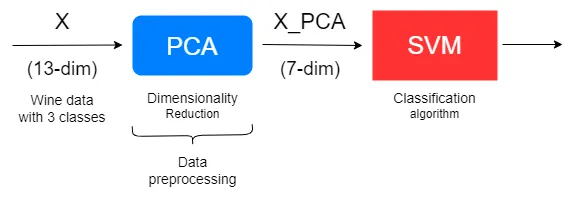

### Benefits of doing PCA
PCA provides absolutely wonderful benefits for us.

- Removes multicollinearity: PCA automatically removes multicollinearity, the correlation between input variables.
- Data visualization: PCA is extremely useful for data visualization. Using the first two or three components, we can create 2D or 3D scatterplots of high-dimensional data.
- Prevents overfitting: PCA reduces the number of features and unnecessary noise in the data. That will prevent the model from overfitting.
- Reduces model training time: When the number of dimensions is low after applying PCA, the data points are close to each other and the calculations will be extremely fast! That will reduce the model training time.
- Saves computational resources: PCA reduces model training time by simplifying calculations. That will save computational resources when training models.
- Reduces model complexity: By reducing the number of features in the dataset, PCA reduces the complexity of models. Simple models are easier to maintain and interpret.
- Finds latent variables: PCA is used to find the latent variables in factor analysis.
Reduces the number of parameters in a neural network: PCA can be used to reduce the number of parameters in an - MLP model. This will reduce training time and improve the model’s performance.
- Compress grayscale images: PCA can be used for grayscale image compression.
- Compress RGB images: PCA can be used for RGB image compression.